In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\wasimansari-iitm\Used-bike-price-predictor\used-bikes-data.csv')

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.nunique()

bike_name      471
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64

In [5]:
df[df['brand'] == 'Bajaj'].sample(5)

,bike_name,price,city,kms_driven,owner,age,power,brand
4056,Bajaj Pulsar 220cc,37000.0,Delhi,12500.0,First Owner,8.0,220.0,Bajaj
17122,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
13410,Bajaj Avenger Street 220,70000.0,Mumbai,8000.0,First Owner,5.0,220.0,Bajaj
23070,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj
27469,Bajaj Pulsar 150cc,25000.0,Delhi,32588.0,First Owner,9.0,150.0,Bajaj


In [6]:
df.shape

(32648, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [8]:
df['owner'].value_counts()

owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

In [9]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [10]:
df['city'].value_counts()

city
Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: count, Length: 443, dtype: int64

In [11]:
def remove_first_and_last_word(name):
    words = name.split()
    if len(words) <= 2:
        return ''  # not enough words to keep anything
    return ' '.join(words[1:-1])

df['bike_name'] = df['bike_name'].apply(remove_first_and_last_word)

In [12]:
df.sample(5)

,bike_name,price,city,kms_driven,owner,age,power,brand
16594,Slingshot Plus,32000.0,Lucknow,22697.0,First Owner,7.0,125.0,Suzuki
16365,FZ,45000.0,Chennai,18742.0,First Owner,6.0,150.0,Yamaha
17629,Enfield Classic,95500.0,Delhi,18000.0,First Owner,8.0,350.0,Royal Enfield
22656,YZF-R15 2.0,55000.0,Rupnagar,27000.0,First Owner,9.0,150.0,Yamaha
24956,CBZ Xtreme,11900.0,Noida,34968.0,First Owner,14.0,150.0,Hero


In [13]:
df['city'].value_counts()

city
Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: count, Length: 443, dtype: int64

In [14]:
state = pd.read_csv(r'C:\Users\user\OneDrive\wasimansari-iitm\Used-bike-price-predictor\indian-city-to-state-mapping.csv')
state.sample(5)

,city,state
630,Patti,Punjab
584,Palitana,Gujarat
1171,Virudhunagar,Tamil Nadu
1008,Sundargarh,Odisha
341,Manendragarh,Chhattisgarh


In [15]:
# Ensure city names are stripped and lowercase for better matching (optional but recommended)
# df['city'] = df['city'].str.strip().str.lower()
# state['city'] = state['city'].str.strip().str.lower()

# Create a dictionary from the state DataFrame
city_to_state = dict(zip(state['city'], state['state']))

# Map the state values into df
df['state'] = df['city'].map(city_to_state)

In [16]:
df.sample(5)

,bike_name,price,city,kms_driven,owner,age,power,brand,state
27583,Pulsar,25000.0,Delhi,32588.0,First Owner,9.0,150.0,Bajaj,Delhi
30307,Apache RTR,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS,Haryana
7218,FZ S V 2.0,65000.0,Jaipur,14391.0,Second Owner,4.0,150.0,Yamaha,Rajasthan
14530,Pulsar,25000.0,Delhi,32588.0,First Owner,9.0,150.0,Bajaj,Delhi
6534,CBR 150R,55000.0,Rohtak,30000.0,First Owner,9.0,150.0,Honda,Haryana


In [17]:
df['state'].isnull().sum()

8725

In [18]:
unmatched_cities = df[df['state'].isnull()]['city'].unique()
print(sorted(unmatched_cities))  # optional: sorted list

['24 Pargana', 'Abohar', 'Alibag', 'Alipore', 'Aluva', 'Ambala', 'Amraoti', 'Anekal', 'Aquem', 'Arkalgud', 'Badarpur', 'Badaun', 'Bagalkot', 'Baghpat', 'Bahadurpur', 'Bally', 'Baloda', 'Balrampur', 'Bangalore', 'Banka', 'Banki', 'Barabanki', 'Baran', 'Barasat', 'Bardhaman', 'Bareilly', 'Baripara', 'Basti', 'Belgaum', 'Bellary', 'Berhampore', 'Berhampur', 'Betul', 'Bharatpur', 'Bhatinda', 'Bhawani Mandi', 'Bhiwadi', 'Bhubaneshwar', 'Bidar', 'Bihar Shariff', 'Bijapur', 'Bijnor', 'Bokaro', 'Bolpur', 'Budhlada', 'Bulandshahr', 'Bundi', 'Burdwan', 'Calicut', 'Cannanore (kannur)', 'Chakan', 'Chaksu', 'Challakere', 'Chandrapur', 'Chatrapur', 'Chenani', 'Chhatarpur', 'Chhindwara', 'Chikamaglur', 'Chikkaballapur', 'Chinchwad', 'Chinsurah', 'Chitradurga', 'Churu', 'Dadra & Nagar Haveli', 'Dadri', 'Dakshina Kannada', 'Deolali', 'Deoria', 'Dharamasala', 'Dhariawad', 'Dharmapuri', 'Dharwad', 'Dharwar', 'Dongargaon', 'Dungarpur', 'Durgapur', 'Dwarka', 'Ernakulam', 'Falakata', 'Farrukhabad', 'Farukha

In [19]:
state_map = {
    '24 pargana': 'West Bengal',
    'abohar': 'Punjab',
    'alibag': 'Maharashtra',
    'alipore': 'West Bengal',
    'aluva': 'Kerala',
    'ambala': 'Haryana',
    'amraoti': 'Maharashtra',
    'anekal': 'Karnataka',
    'aquem': 'Goa',
    'arkalgud': 'Karnataka',
    'badarpur': 'Delhi',
    'badaun': 'Uttar Pradesh',
    'bagalkot': 'Karnataka',
    'baghpat': 'Uttar Pradesh',
    'bahadurpur': 'Punjab',
    'bally': 'West Bengal',
    'baloda': 'Chhattisgarh',
    'balrampur': 'Uttar Pradesh',
    'bangalore': 'Karnataka',
    'banka': 'Bihar',
    'banki': 'Odisha',
    'barabanki': 'Uttar Pradesh',
    'baran': 'Rajasthan',
    'barasat': 'West Bengal',
    'bardhaman': 'West Bengal',
    'bareilly': 'Uttar Pradesh',
    'baripara': 'West Bengal',
    'basti': 'Uttar Pradesh',
    'belgaum': 'Karnataka',
    'bellary': 'Karnataka',
    'berhampore': 'West Bengal',
    'berhampur': 'Odisha',
    'betul': 'Madhya Pradesh',
    'bharatpur': 'Rajasthan',
    'bhatinda': 'Punjab',
    'bhawani mandi': 'Rajasthan',
    'bhiwadi': 'Rajasthan',
    'bhubaneshwar': 'Odisha',
    'bidar': 'Karnataka',
    'bihar shariff': 'Bihar',
    'bijapur': 'Karnataka',
    'bijnor': 'Uttar Pradesh',
    'bokaro': 'Jharkhand',
    'bolpur': 'West Bengal',
    'budhlada': 'Punjab',
    'bulandshahr': 'Uttar Pradesh',
    'bundi': 'Rajasthan',
    'burdwan': 'West Bengal',
    'calicut': 'Kerala',
    'cannanore (kannur)': 'Kerala',
    'chakan': 'Maharashtra',
    'chaksu': 'Rajasthan',
    'challakere': 'Karnataka',
    'chandrapur': 'Maharashtra',
    'chatrapur': 'Odisha',
    'chenani': 'Jammu and Kashmir',
    'chhatarpur': 'Madhya Pradesh',
    'chhindwara': 'Madhya Pradesh',
    'chikamaglur': 'Karnataka',
    'chikkaballapur': 'Karnataka',
    'chinchwad': 'Maharashtra',
    'chinsurah': 'West Bengal',
    'chitradurga': 'Karnataka',
    'churu': 'Rajasthan',
    'dadra & nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadri': 'Uttar Pradesh',
    'dakshina kannada': 'Karnataka',
    'deolali': 'Maharashtra',
    'deoria': 'Uttar Pradesh',
    'dharamasala': 'Himachal Pradesh',
    'dhariawad': 'Rajasthan',
    'dharmapuri': 'Tamil Nadu',
    'dharwad': 'Karnataka',
    'dharwar': 'Karnataka',
    'dongargaon': 'Chhattisgarh',
    'dungarpur': 'Rajasthan',
    'durgapur': 'West Bengal',
    'dwarka': 'Delhi',
    'ernakulam': 'Kerala',
    'falakata': 'West Bengal',
    'farrukhabad': 'Uttar Pradesh',
    'farukhabad': 'Uttar Pradesh',
    'ferozepur': 'Punjab',
    'gadarpur': 'Uttarakhand',
    'gadchiroli': 'Maharashtra',
    'ganaur': 'Haryana',
    'gandhidham': 'Gujarat',
    'gandhinagar': 'Gujarat',
    'gangaghat': 'Uttar Pradesh',
    'gangaikondan': 'Tamil Nadu',
    'ganganagar': 'Rajasthan',
    'gangtok': 'Sikkim',
    'gautam buddha nagar': 'Uttar Pradesh',
    'ghaziabad': 'Uttar Pradesh',
    'ghazipur': 'Uttar Pradesh',
    'goa-panaji': 'Goa',
    'godavari': 'Andhra Pradesh',
    'godhara': 'Gujarat',
    'gondia': 'Maharashtra',
    'gorakhpur': 'Uttar Pradesh',
    'goregaon': 'Maharashtra',
    'hamirpur': 'Uttar Pradesh',
    'hamirpur(hp)': 'Himachal Pradesh',
    'hanumangarh': 'Rajasthan',
    'haridwar': 'Uttarakhand',
    'herbertpur': 'Uttarakhand',
    'hissar': 'Haryana',
    'honavar': 'Karnataka',
    'hooghly': 'West Bengal',
    'hospet': 'Karnataka',
    'hosur': 'Tamil Nadu',
    'howrah': 'West Bengal',
    'hubli': 'Karnataka',
    'idukki': 'Kerala',
    'indi': 'Karnataka',
    'jaisalmer': 'Rajasthan',
    'jajpur': 'Odisha',
    'jalaun': 'Uttar Pradesh',
    'jalgaon': 'Maharashtra',
    'jamtara': 'Jharkhand',
    'jaunpur': 'Uttar Pradesh',
    'jhajjar': 'Haryana',
    'jhalawar': 'Rajasthan',
    'jhunjhunu': 'Rajasthan',
    'jobner': 'Rajasthan',
    'junagadh': 'Gujarat',
    'kachchh': 'Gujarat',
    'kalyan': 'Maharashtra',
    'kanchipuram': 'Tamil Nadu',
    'kanpur nagar': 'Uttar Pradesh',
    'kanyakumari': 'Tamil Nadu',
    'karim nagar': 'Telangana',
    'kartarpur': 'Punjab',
    'kasargode': 'Kerala',
    'kasba': 'Bihar',
    'katni': 'Madhya Pradesh',
    'kendua': 'West Bengal',
    'khalilabad': 'Uttar Pradesh',
    'khandela': 'Rajasthan',
    'khandwa': 'Madhya Pradesh',
    'kheda': 'Gujarat',
    'khedbrahma': 'Gujarat',
    'kolhapur': 'Maharashtra',
    'koppal': 'Karnataka',
    'kota': 'Rajasthan',
    'kotdwar': 'Uttarakhand',
    'krishna': 'Andhra Pradesh',
    'krishnagar': 'West Bengal',
    'kullu': 'Himachal Pradesh',
    'kurukshetra': 'Haryana',
    'lansdowne': 'Uttarakhand',
    'lonavala': 'Maharashtra',
    'manali': 'Himachal Pradesh',
    'mangalore': 'Karnataka',
    'marandahalli': 'Tamil Nadu',
    'mehsana': 'Gujarat',
    'mettur': 'Tamil Nadu',
    'mohammadabad': 'Uttar Pradesh',
    'morbi': 'Gujarat',
    'mubarakpur': 'Uttar Pradesh',
    'mughalsarai': 'Uttar Pradesh',
    'mumbai': 'Maharashtra',
    'murad nagar': 'Uttar Pradesh',
    'muzaffarnagar': 'Uttar Pradesh',
    'mysore': 'Karnataka',
    'nalagarh': 'Himachal Pradesh',
    'nanded': 'Maharashtra',
    'naraingarh': 'Haryana',
    'nayagarh': 'Odisha',
    'nazira': 'Assam',
    'palamu': 'Jharkhand',
    'parola': 'Maharashtra',
    'poonamallee': 'Tamil Nadu',
    'raigarh(mh)': 'Maharashtra',
    'raiwala': 'Uttarakhand',
    'rajouri': 'Jammu and Kashmir',
    'ramanagar': 'Karnataka',
    'ranga reddy': 'Telangana',
    'rangpo': 'Sikkim',
    'ranip': 'Gujarat',
    'ranoli': 'Gujarat',
    'sant kabir nagar': 'Uttar Pradesh',
    'secunderabad': 'Telangana',
    'seppa': 'Arunachal Pradesh',
    'shimoga': 'Karnataka',
    'sholapur': 'Maharashtra',
    'silvasa': 'Dadra and Nagar Haveli and Daman and Diu',
    'singhbhum': 'Jharkhand',
    'sonepat': 'Haryana',
    'sri ganganagar': 'Rajasthan',
    'surendranagar': 'Gujarat',
    'swaimadhopur': 'Rajasthan',
    'tiruvallur': 'Tamil Nadu',
    'tiruverkadu': 'Tamil Nadu',
    'trivandrum': 'Kerala',
    'uluberia': 'West Bengal',
    'uppidamangalam': 'Tamil Nadu',
    'vandalur': 'Tamil Nadu',
    'vasai': 'Maharashtra',
    'vastral': 'Gujarat',
    'virar': 'Maharashtra',
    'yamuna nagar': 'Haryana'
}


In [20]:
df['city_lower'] = df['city'].str.strip().str.lower()

# Fill in missing states from the manual map
df['state'] = df['state'].fillna(df['city_lower'].map(state_map))

# Optional: drop helper column
df.drop(columns=['city_lower'], inplace=True)

In [21]:
df['state'].isnull().sum()

0

In [22]:
df.sample(5)

,bike_name,price,city,kms_driven,owner,age,power,brand,state
22948,Fazer 25,123000.0,Kadapa,14500.0,First Owner,4.0,250.0,Yamaha,Andhra Pradesh
18814,Dominar 400,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj,Telangana
17863,Avenger Street,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj,Delhi
23172,Passion,18000.0,Hyderabad,3869.0,First Owner,16.0,100.0,Hero,Telangana
1692,FZ25 ABS,130000.0,Mumbai,1143.0,Second Owner,2.0,250.0,Yamaha,Maharashtra


In [23]:
df.nunique()

bike_name      375
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
state           30
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

# Count how many times each state appears
state_counts = df['state'].value_counts()

# Keep only states with at least 2 samples
valid_states = state_counts[state_counts >= 2].index

# Filter the dataframe
df_filtered = df[df['state'].isin(valid_states)].copy()

train, test = train_test_split(
    df_filtered,
    test_size=8000,
    stratify=df_filtered['state'],
    random_state=42
)

In [25]:
print(train.shape, test.shape)

(24647, 9) (8000, 9)


In [26]:
train.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand', 'state'],
      dtype='object')

In [27]:
test.sample(3)

,bike_name,price,city,kms_driven,owner,age,power,brand,state
14367,Street 750,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson,Rajasthan
7825,Enfield Classic,107000.0,Delhi,16505.0,First Owner,5.0,350.0,Royal Enfield,Delhi
24347,SZ-RR,20000.0,Kanchipuram,52000.0,First Owner,10.0,150.0,Yamaha,Tamil Nadu


In [28]:
y_train = train['price']
X_train = train.drop(columns=['price'])
y_test = test['price']
X_test = test.drop(columns=['price'])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24647, 8) (24647,) (8000, 8) (8000,)


In [29]:
from sklearn import set_config
set_config(transform_output='pandas')

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder

# --- Columns ---
target_enc_cols = ['bike_name', 'city']
onehot_cols = ['state', 'owner', 'brand']
numeric_cols = ['kms_driven', 'age', 'power']

# --- Target Encoding + Scaling ---
target_pipe = Pipeline(steps=[
    ('target_enc', TargetEncoder()),
    ('scale', StandardScaler())
])

# --- OneHot Encoding (no need to scale) ---
onehot_pipe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# --- Scaling numeric columns directly ---
numeric_pipe = StandardScaler()

# --- ColumnTransformer combining all ---
full_preprocessor = ColumnTransformer(transformers=[
    ('target', target_pipe, target_enc_cols),
    ('onehot', onehot_pipe, onehot_cols),
    ('numeric', numeric_pipe, numeric_cols)
])

# Fit on training data
full_preprocessor.fit(X_train, y_train)

# Transform train/test or user input
X_train_processed = full_preprocessor.transform(X_train)
X_test_processed = full_preprocessor.transform(X_test)

In [31]:
X_train_processed.sample(5)

,target__bike_name,target__city,onehot__state_Andhra Pradesh,onehot__state_Assam,onehot__state_Bihar,onehot__state_Chandigarh,onehot__state_Chhattisgarh,onehot__state_Dadra and Nagar Haveli and Daman and Diu,onehot__state_Delhi,onehot__state_Goa,...,onehot__brand_Rajdoot,onehot__brand_Royal Enfield,onehot__brand_Suzuki,onehot__brand_TVS,onehot__brand_Triumph,onehot__brand_Yamaha,onehot__brand_Yezdi,numeric__kms_driven,numeric__age,numeric__power
18164,-0.665337,-0.431676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.161501,-0.016764,-0.843564
23416,-0.088906,-0.212059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.024952,0.231089,-0.470494
23895,-0.428240,-0.405439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.649914,0.974648,-0.657029
17013,-0.644497,-0.758348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.141171,0.478942,-0.470494
4706,1.062952,0.041131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636640,-0.512469,1.320240


In [73]:
import pickle

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(full_preprocessor, f)

# import joblib
# preprocessor = joblib.load('preprocessor.pkl')

# # X_input must be a DataFrame with the same columns
# X_input_processed = preprocessor.transform(X_input)

In [74]:
with open('preprocessor.pkl', 'rb') as f:
    pre = pickle.load(f)

print(type(pre))

<class 'sklearn.compose._column_transformer.ColumnTransformer'>


In [33]:
X_train_processed.columns

Index(['target__bike_name', 'target__city', 'onehot__state_Andhra Pradesh',
       'onehot__state_Assam', 'onehot__state_Bihar',
       'onehot__state_Chandigarh', 'onehot__state_Chhattisgarh',
       'onehot__state_Dadra and Nagar Haveli and Daman and Diu',
       'onehot__state_Delhi', 'onehot__state_Goa', 'onehot__state_Gujarat',
       'onehot__state_Haryana', 'onehot__state_Himachal Pradesh',
       'onehot__state_Jammu and Kashmir', 'onehot__state_Jharkhand',
       'onehot__state_Karnataka', 'onehot__state_Kerala',
       'onehot__state_Madhya Pradesh', 'onehot__state_Maharashtra',
       'onehot__state_Meghalaya', 'onehot__state_Odisha',
       'onehot__state_Puducherry', 'onehot__state_Punjab',
       'onehot__state_Rajasthan', 'onehot__state_Sikkim',
       'onehot__state_Tamil Nadu', 'onehot__state_Telangana',
       'onehot__state_Tripura', 'onehot__state_Uttar Pradesh',
       'onehot__state_Uttarakhand', 'onehot__state_West Bengal',
       'onehot__owner_First Owner', 'on

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_processed, y_train, shuffle=True, random_state=41)

print(X_train.shape, X_val.shape)

(18485, 61) (6162, 61)


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=41,
        verbosity=1,
        n_jobs=-1
    )

def fit_predict_score(model, X_train, y_train, X_val, y_val):
    # Fit model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_val)

    # Score
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"✅ Model Performance:")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    
    return y_pred, {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

# Fit and evaluate
y_pred, scores = fit_predict_score(xgb_model, X_train, y_train, X_val, y_val)

✅ Model Performance:
MAE : 3595.1292
MSE : 613733454.1764
RMSE: 24773.6443
R²  : 0.9388


In [58]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from numpy import arange

param_dist = {
    'n_estimators': [int(x) for x in range(100, 301, 50)],  # 100, 150, 200, 250, 300
    'learning_rate': list(arange(0.03, 0.11, 0.01)),        # 0.03 to 0.10 (step 0.01)
    'max_depth': list(range(4, 11, 2)),                     # 4, 6, 8, 10
    'min_child_weight': list(range(1, 7, 2)),               # 1, 3, 5
    'subsample': list(arange(0.7, 1.01, 0.1)),              # 0.7, 0.8, 0.9, 1.0
    'colsample_bytree': list(arange(0.7, 1.01, 0.1)),       # 0.7, 0.8, 0.9, 1.0
    'reg_alpha': list(arange(0, 1.1, 0.2)),                 # 0.0, 0.2, ..., 1.0
    'reg_lambda': list(arange(0.5, 2.1, 0.3))               # 0.5, 0.8, ..., 2.0
}

xgb_base = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=41
)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    scoring='r2',
    n_iter=100,
    random_state=41,
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("✅ Best Parameters:")
print(random_search.best_params_)
y_pred, scores = fit_predict_score(best_model, X_train, y_train, X_val, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
✅ Best Parameters:
{'subsample': 0.9999999999999999, 'reg_lambda': 2.0, 'reg_alpha': 0.8, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.060000000000000005, 'colsample_bytree': 0.9999999999999999}
✅ Model Performance:
MAE : 3851.1867
MSE : 671082918.4156
RMSE: 25905.2682
R²  : 0.9331


In [71]:
import joblib
joblib.dump(best_model, 'model.pkl')

['model.pkl']

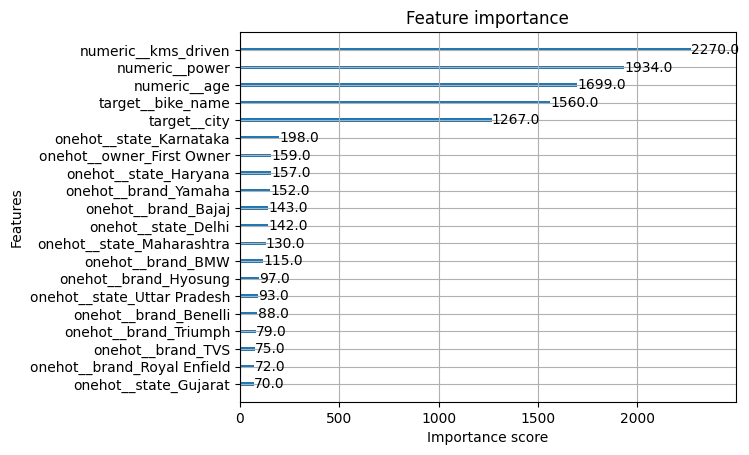

In [64]:
xgb.plot_importance(best_model, max_num_features=20)
import matplotlib.pyplot as plt
plt.show()

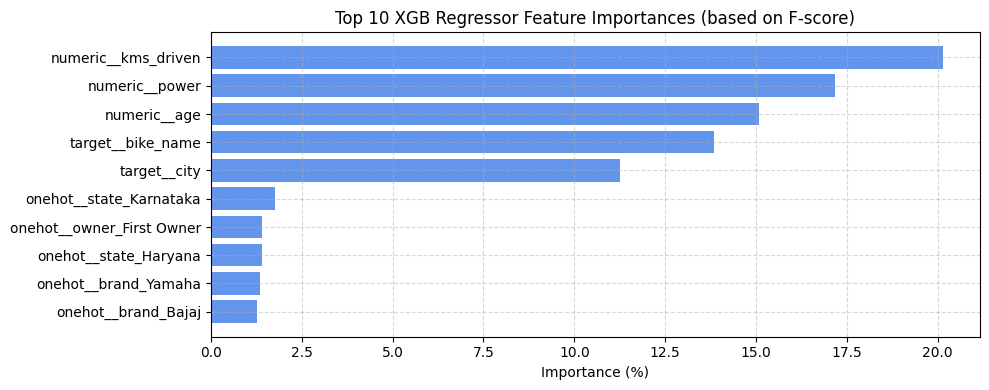

In [65]:
from xgboost import plot_importance

# Get raw F-score (weight-based) importances
fscore_dict = best_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame
fscore_df = pd.DataFrame(list(fscore_dict.items()), columns=['Feature', 'Fscore'])

# Total F-score
total_fscore = fscore_df['Fscore'].sum()

# Calculate percentage importance
fscore_df['Importance (%)'] = 100 * fscore_df['Fscore'] / total_fscore

# Sort by importance
fscore_df = fscore_df.sort_values(by='Importance (%)', ascending=False)

# Plot Top 20 Features
top_n = 10
top_features = fscore_df.head(top_n)

plt.figure(figsize=(10, 4))
plt.barh(top_features['Feature'], top_features['Importance (%)'], color='cornflowerblue')
plt.xlabel('Importance (%)')
plt.title(f'Top {top_n} XGB Regressor Feature Importances (based on F-score)')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [61]:
fscore_df.head()

,Feature,Fscore,Importance (%)
0,target__bike_name,769.0,19.932608
52,numeric__kms_driven,763.0,19.777087
1,target__city,477.0,12.363919
53,numeric__age,450.0,11.664075
54,numeric__power,395.0,10.238466


In [62]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring=scoring,
        train_sizes=train_sizes,
        n_jobs=-1,
        verbose=0
    )

    # Convert scores (neg MSE) to positive RMSE
    train_rmse = np.sqrt(-train_scores)
    val_rmse = np.sqrt(-val_scores)

    # Mean and std
    train_mean = np.mean(train_rmse, axis=1)
    val_mean = np.mean(val_rmse, axis=1)
    train_std = np.std(train_rmse, axis=1)
    val_std = np.std(val_rmse, axis=1)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(train_sizes, train_mean, label='Training RMSE', marker='o')
    plt.plot(train_sizes, val_mean, label='Validation RMSE', marker='s')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

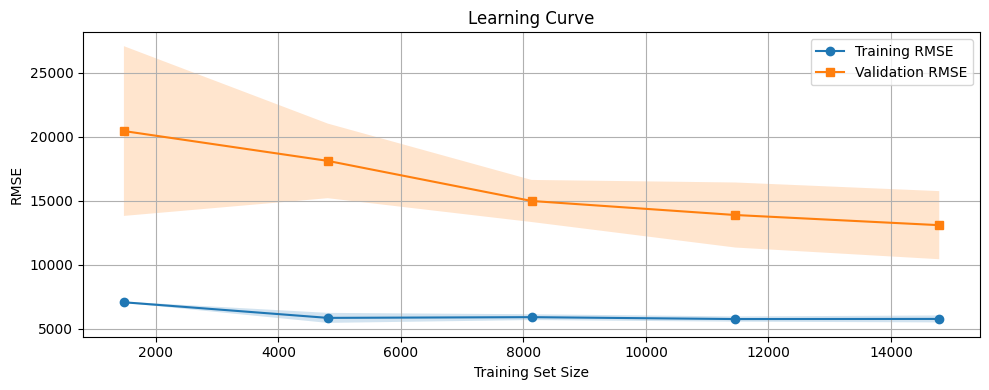

In [66]:
plot_learning_curve(best_model, X_train, y_train, cv=5)

In [43]:
from sklearn.model_selection import learning_curve

def plot_learning_curve_r2(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring='r2',  # R² score
        train_sizes=train_sizes,
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(train_sizes, train_mean, label='Training R²', marker='o')
    plt.plot(train_sizes, val_mean, label='Validation R²', marker='s')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    plt.title('Learning Curve (R² Score)')
    plt.xlabel('Training Set Size')
    plt.ylabel('R² Score')
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

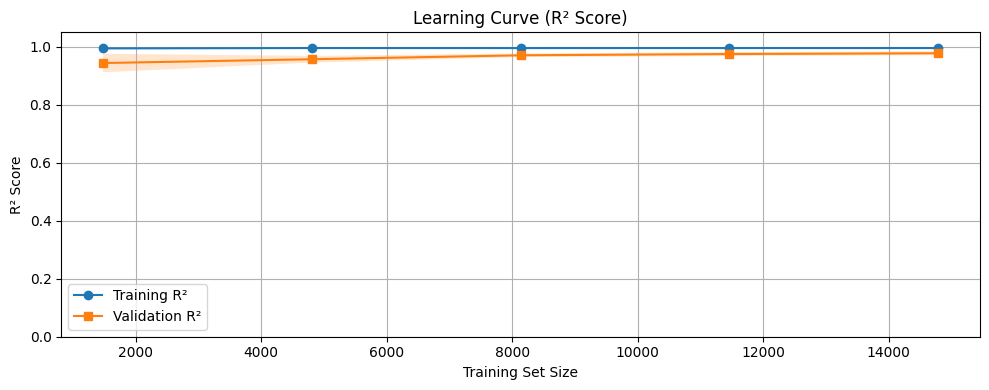

In [67]:
plot_learning_curve_r2(best_model, X_train, y_train)

In [45]:
from sklearn import set_config
set_config(transform_output='default')

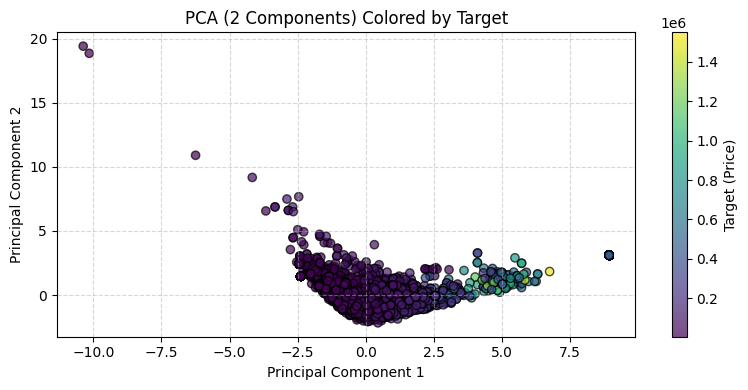

In [46]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Target (Price)')
plt.title('PCA (2 Components) Colored by Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [47]:
X_test.head()

,bike_name,city,kms_driven,owner,age,power,brand,state
22625,Avenger Street,Mumbai,8000.0,First Owner,5.0,220.0,Bajaj,Maharashtra
30764,Avenger Street,Delhi,20373.0,First Owner,6.0,220.0,Bajaj,Delhi
6578,Enfield Classic,Faridabad,15932.0,First Owner,4.0,350.0,Royal Enfield,Haryana
30065,Slingshot Plus,Lucknow,22697.0,First Owner,7.0,125.0,Suzuki,Uttar Pradesh
14229,Pulsar,Ghaziabad,64955.0,First Owner,15.0,150.0,Bajaj,Uttar Pradesh


In [68]:
y_pred_test, scores = fit_predict_score(best_model, X_train, y_train, X_test_processed, y_test)

✅ Model Performance:
MAE : 3491.9447
MSE : 398623028.7719
RMSE: 19965.5460
R²  : 0.9487


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(oob_score = True, bootstrap=True, random_state = 41)

y_pred_rf, scores = fit_predict_score(rf, X_train, y_train, X_test_processed, y_test)

✅ Model Performance:
MAE : 3069.7989
MSE : 340836752.2249
RMSE: 18461.7646
R²  : 0.9562
